In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/sales_data.csv", parse_dates=["Date"])


Matplotlib is building the font cache; this may take a moment.


In [3]:
display(df.head())
df.info()
df.describe(include="all")
df.isna().sum().sort_values(ascending=False)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

Date                0
Day                 0
Cost                0
Profit              0
Unit_Price          0
Unit_Cost           0
Order_Quantity      0
Product             0
Sub_Category        0
Product_Category    0
State               0
Country             0
Customer_Gender     0
Age_Group           0
Customer_Age        0
Year                0
Month               0
Revenue             0
dtype: int64

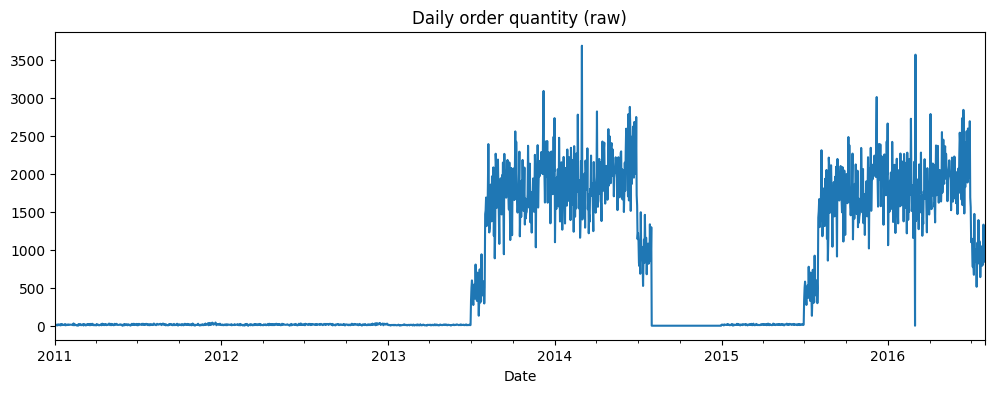

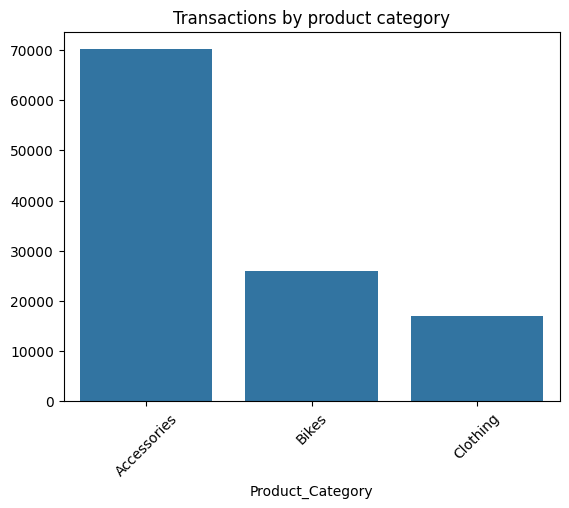

In [4]:
# daily order qty trend
df.set_index("Date")["Order_Quantity"].resample("D").sum().plot(figsize=(12,4))
plt.title("Daily order quantity (raw)"); plt.show()

# product-category share
cat_counts = df["Product_Category"].value_counts()
sns.barplot(x=cat_counts.index, y=cat_counts.values)
plt.xticks(rotation=45); plt.title("Transactions by product category"); plt.show()


In [6]:
profile = ProfileReport(df, title="Lahn Inc. Sales Data – Quality & EDA", minimal=True)
profile.to_file("../docs/data_quality_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████| 18/18 [00:00<00:00, 3950.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]